In [190]:
import networkx as nx
import pandas as pd

In [191]:
edges = pd.read_csv('edges.csv', sep=',')
nodelist = pd.read_csv('nodelist.csv', sep=',')
G = nx.from_pandas_edgelist(edges, '# source', ' target')

In [192]:
node_attr = dict(nodelist.club)
nx.set_node_attributes(G, node_attr, 'club')

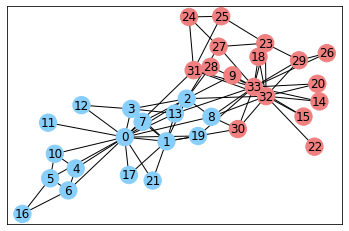

In [214]:
colors = ['lightskyblue' if n[1]['club'] == 'Mr. Hi' else 'lightcoral' for n in G.nodes(data = True)]
nx.draw_networkx(G, node_color = colors)

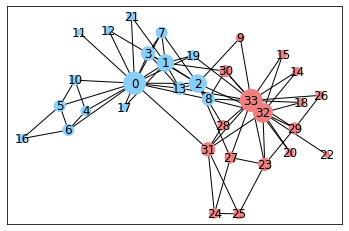

In [215]:
sizes = [i[1] * 30 for i in list(G.degree())]
nx.draw_networkx(G, node_color = colors, node_size = sizes)

In [195]:
nx.density(G)

0.13725490196078433

In [196]:
nx.diameter(G)

5

In [197]:
nx.degree_centrality(G)

{0: 0.48484848484848486,
 1: 0.2727272727272727,
 2: 0.30303030303030304,
 3: 0.18181818181818182,
 4: 0.09090909090909091,
 5: 0.12121212121212122,
 6: 0.12121212121212122,
 7: 0.12121212121212122,
 8: 0.15151515151515152,
 10: 0.09090909090909091,
 11: 0.030303030303030304,
 12: 0.06060606060606061,
 13: 0.15151515151515152,
 17: 0.06060606060606061,
 19: 0.09090909090909091,
 21: 0.06060606060606061,
 31: 0.18181818181818182,
 30: 0.12121212121212122,
 9: 0.06060606060606061,
 27: 0.12121212121212122,
 28: 0.09090909090909091,
 32: 0.36363636363636365,
 16: 0.06060606060606061,
 33: 0.48484848484848486,
 23: 0.15151515151515152,
 25: 0.09090909090909091,
 29: 0.12121212121212122,
 24: 0.09090909090909091,
 26: 0.06060606060606061,
 14: 0.06060606060606061,
 15: 0.06060606060606061,
 18: 0.06060606060606061,
 20: 0.06060606060606061,
 22: 0.030303030303030304}

In [198]:
nx.betweenness_centrality(G)

{0: 0.43764580327080344,
 1: 0.053873556998557,
 2: 0.1522637085137085,
 3: 0.01196188071188071,
 4: 0.0006313131313131313,
 5: 0.02998737373737374,
 6: 0.029987373737373736,
 7: 0.0,
 8: 0.056737012987012996,
 10: 0.0006313131313131313,
 11: 0.0,
 12: 0.0,
 13: 0.04159151034151034,
 17: 0.0,
 19: 0.02936056998556999,
 21: 0.0,
 31: 0.14034842472342476,
 30: 0.014727633477633473,
 9: 0.0008477633477633478,
 27: 0.02170214045214045,
 28: 0.0017947330447330447,
 32: 0.18215788840788844,
 16: 0.0,
 33: 0.27505561568061565,
 23: 0.018244949494949494,
 25: 0.0038404882154882162,
 29: 0.0038690476190476187,
 24: 0.0022095959595959595,
 26: 0.0,
 14: 0.0,
 15: 0.0,
 18: 0.0,
 20: 0.0,
 22: 0.0}

In [199]:
nx.closeness_centrality(G)

{0: 0.5689655172413793,
 1: 0.4852941176470588,
 2: 0.559322033898305,
 3: 0.4647887323943662,
 4: 0.3793103448275862,
 5: 0.38372093023255816,
 6: 0.38372093023255816,
 7: 0.44,
 8: 0.515625,
 10: 0.3793103448275862,
 11: 0.36666666666666664,
 12: 0.3707865168539326,
 13: 0.5076923076923077,
 17: 0.375,
 19: 0.4925373134328358,
 21: 0.375,
 31: 0.5409836065573771,
 30: 0.4583333333333333,
 9: 0.42857142857142855,
 27: 0.4520547945205479,
 28: 0.44594594594594594,
 32: 0.515625,
 16: 0.28448275862068967,
 33: 0.5409836065573771,
 23: 0.39285714285714285,
 25: 0.375,
 29: 0.38372093023255816,
 24: 0.375,
 26: 0.358695652173913,
 14: 0.3707865168539326,
 15: 0.3707865168539326,
 18: 0.3707865168539326,
 20: 0.3707865168539326,
 22: 0.34375}

In [200]:
nx.eigenvector_centrality(G)

{0: 0.36872596095610966,
 1: 0.275608544855244,
 2: 0.3243678114012024,
 3: 0.2197759450627841,
 4: 0.07971043643022753,
 5: 0.08345909577948038,
 6: 0.0834590957794804,
 7: 0.1781071732757733,
 8: 0.22789782008485054,
 10: 0.07971043643022754,
 11: 0.05525776188021192,
 12: 0.08819365157574227,
 13: 0.23152343277913826,
 17: 0.09656084845612938,
 19: 0.14997710795949434,
 21: 0.09656084845612938,
 31: 0.19027268463495864,
 30: 0.17348683115148705,
 9: 0.10202669462747854,
 27: 0.13253597799860406,
 28: 0.13054156118688934,
 32: 0.29769755751183175,
 16: 0.02501444421522389,
 33: 0.35643233109637346,
 23: 0.14635687790131963,
 25: 0.05902414993053635,
 29: 0.13090933019085865,
 24: 0.057222765668453454,
 26: 0.07303490273351672,
 14: 0.09803033556212525,
 15: 0.09803033556212525,
 18: 0.09803033556212525,
 20: 0.09803033556212525,
 22: 0.04461407605876028}